In [1]:
import numpy as np
from skimage import io
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import src.plots
import src.models
import src.data

In [2]:
plt.rcParams.update({'font.size': 16}) #Globally set font size for plots

In [3]:
# Load the test and train data
X_train, X_test, y_train, y_test = src.data.load_data('data')

## Exploratory Data Analysis

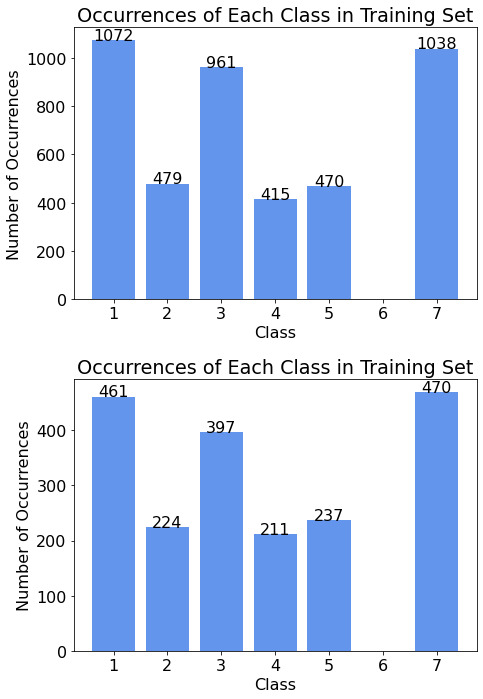

In [4]:
fig, axs = plt.subplots(2,1,figsize=(7,10))
src.plots.class_bar_plot(axs[0], y_train, 'Occurrences of Each Class in Training Set', 'Class', 'Number of Occurrences')
src.plots.class_bar_plot(axs[1], y_test, 'Occurrences of Each Class in Training Set', 'Class', 'Number of Occurrences')
fig.tight_layout()

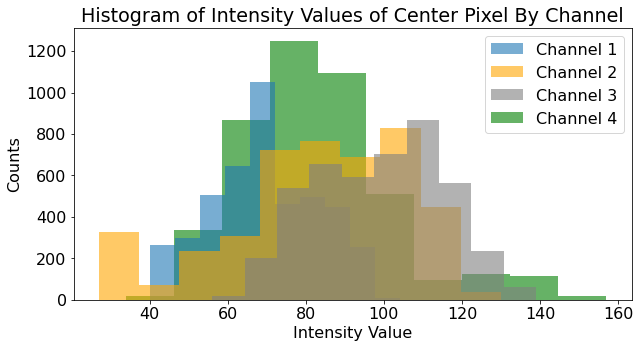

In [5]:
# Plot a histogram of intensity values for the center pixel of each channel
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(X_train[:,19], color='green', alpha=0.6, label='Channel 4')
ax.hist(X_train[:,16], alpha = 0.6, label='Channel 1')
ax.hist(X_train[:,17], color='orange', alpha=0.6, label='Channel 2')
ax.hist(X_train[:,18], color='gray', alpha=0.6, label='Channel 3')

ax.set_title('Histogram of Intensity Values of Center Pixel By Channel')
ax.set_xlabel('Intensity Value')
ax.set_ylabel('Counts')

handles, labels = ax.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels)

## Baseline Model

In [6]:
base_model = src.models.Baseline() #Instantiate baseline model object
base_model.fit(X_train[:,16:20], y_train)  #Fit model using only center pixels

In [7]:
y_test_predict = base_model.predict(X_test[:,16:20]) 

In [8]:
print(f'Baseline Model Accuracy: {accuracy_score(y_test,y_test_predict)}') # Baseline model accuracy

Baseline Model Accuracy: 0.7685


## Neural Network

In [9]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [10]:
# One hot encode the target data for use with the neural network 
enc = OneHotEncoder()
enc.fit(y_train.reshape(-1,1))
y_trn_1hot, y_test_1hot = enc.transform(y_train.reshape(-1,1)).toarray(), enc.transform(y_test.reshape(-1,1)).toarray()

In [11]:
# Scale the data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_trn_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)

In [12]:
# Set parameters for neural network architecture and training
opt = keras.optimizers.Adam(learning_rate=0.0005)
hidden_units = 50
n_classes = 6
n_hidden = 1
es = keras.callbacks.EarlyStopping(monitor='loss', patience=100)

In [13]:
model = src.models.create_model(X_trn_scaled, n_classes, n_hidden, opt, hidden_units, activ='exponential')

In [14]:
history = model.fit(X_trn_scaled, y_trn_1hot, epochs=700, batch_size=20, verbose=1, validation_split=0, callbacks=es)

Epoch 1/700
222/222 [==============================] - 0s 672us/step - loss: 1.5357 - accuracy: 0.4291
Epoch 2/700
222/222 [==============================] - 0s 674us/step - loss: 0.8332 - accuracy: 0.7346
Epoch 3/700
222/222 [==============================] - 0s 578us/step - loss: 0.5691 - accuracy: 0.7932
Epoch 4/700
222/222 [==============================] - 0s 664us/step - loss: 0.5266 - accuracy: 0.8120
Epoch 5/700
222/222 [==============================] - 0s 634us/step - loss: 0.5042 - accuracy: 0.8131
Epoch 6/700
222/222 [==============================] - 0s 671us/step - loss: 0.4930 - accuracy: 0.8212
Epoch 7/700
222/222 [==============================] - 0s 663us/step - loss: 0.4753 - accuracy: 0.8257
Epoch 8/700
222/222 [==============================] - 0s 665us/step - loss: 0.4620 - accuracy: 0.8266
Epoch 9/700
222/222 [==============================] - 0s 625us/step - loss: 0.4593 - accuracy: 0.8302
Epoch 10/700
222/222 [==============================] - 0s 586us/step - l

222/222 [==============================] - 0s 654us/step - loss: 0.3404 - accuracy: 0.8636
Epoch 80/700
222/222 [==============================] - 0s 658us/step - loss: 0.3342 - accuracy: 0.8661
Epoch 81/700
222/222 [==============================] - 0s 554us/step - loss: 0.3350 - accuracy: 0.8685
Epoch 82/700
222/222 [==============================] - 0s 561us/step - loss: 0.3371 - accuracy: 0.8683
Epoch 83/700
222/222 [==============================] - 0s 557us/step - loss: 0.3333 - accuracy: 0.8697
Epoch 84/700
222/222 [==============================] - 0s 650us/step - loss: 0.3367 - accuracy: 0.8667
Epoch 85/700
222/222 [==============================] - 0s 582us/step - loss: 0.3329 - accuracy: 0.8703
Epoch 86/700
222/222 [==============================] - 0s 641us/step - loss: 0.3373 - accuracy: 0.8685
Epoch 87/700
222/222 [==============================] - 0s 597us/step - loss: 0.3260 - accuracy: 0.8703
Epoch 88/700
222/222 [==============================] - 0s 648us/step - loss:

222/222 [==============================] - 0s 626us/step - loss: 0.3081 - accuracy: 0.8803
Epoch 158/700
222/222 [==============================] - 0s 626us/step - loss: 0.3070 - accuracy: 0.8762
Epoch 159/700
222/222 [==============================] - 0s 628us/step - loss: 0.3090 - accuracy: 0.8737
Epoch 160/700
222/222 [==============================] - 0s 561us/step - loss: 0.3069 - accuracy: 0.8796
Epoch 161/700
222/222 [==============================] - 0s 632us/step - loss: 0.3072 - accuracy: 0.8778
Epoch 162/700
222/222 [==============================] - 0s 663us/step - loss: 0.3071 - accuracy: 0.8762
Epoch 163/700
222/222 [==============================] - 0s 569us/step - loss: 0.3044 - accuracy: 0.8800
Epoch 164/700
222/222 [==============================] - 0s 884us/step - loss: 0.3077 - accuracy: 0.8762
Epoch 165/700
222/222 [==============================] - 0s 528us/step - loss: 0.3048 - accuracy: 0.8749
Epoch 166/700
222/222 [==============================] - 0s 541us/ste

222/222 [==============================] - 0s 594us/step - loss: 0.2854 - accuracy: 0.8848
Epoch 236/700
222/222 [==============================] - 0s 596us/step - loss: 0.2869 - accuracy: 0.8834
Epoch 237/700
222/222 [==============================] - 0s 533us/step - loss: 0.2890 - accuracy: 0.8866
Epoch 238/700
222/222 [==============================] - 0s 661us/step - loss: 0.2835 - accuracy: 0.8855
Epoch 239/700
222/222 [==============================] - 0s 625us/step - loss: 0.2847 - accuracy: 0.8868
Epoch 240/700
222/222 [==============================] - 0s 514us/step - loss: 0.2831 - accuracy: 0.8848
Epoch 241/700
222/222 [==============================] - 0s 593us/step - loss: 0.2884 - accuracy: 0.8816
Epoch 242/700
222/222 [==============================] - 0s 618us/step - loss: 0.2851 - accuracy: 0.8841
Epoch 243/700
222/222 [==============================] - 0s 582us/step - loss: 0.2827 - accuracy: 0.8873
Epoch 244/700
222/222 [==============================] - 0s 573us/ste

222/222 [==============================] - 0s 770us/step - loss: 0.2694 - accuracy: 0.8915
Epoch 314/700
222/222 [==============================] - 0s 649us/step - loss: 0.2684 - accuracy: 0.8900
Epoch 315/700
222/222 [==============================] - 0s 622us/step - loss: 0.2696 - accuracy: 0.8929
Epoch 316/700
222/222 [==============================] - 0s 584us/step - loss: 0.2716 - accuracy: 0.8909
Epoch 317/700
222/222 [==============================] - 0s 566us/step - loss: 0.2689 - accuracy: 0.8875
Epoch 318/700
222/222 [==============================] - 0s 534us/step - loss: 0.2665 - accuracy: 0.8940
Epoch 319/700
222/222 [==============================] - 0s 622us/step - loss: 0.2693 - accuracy: 0.8913
Epoch 320/700
222/222 [==============================] - 0s 638us/step - loss: 0.2703 - accuracy: 0.8913
Epoch 321/700
222/222 [==============================] - 0s 649us/step - loss: 0.2690 - accuracy: 0.8929
Epoch 322/700
222/222 [==============================] - 0s 588us/ste

222/222 [==============================] - 0s 642us/step - loss: 0.2578 - accuracy: 0.8945
Epoch 392/700
222/222 [==============================] - 0s 637us/step - loss: 0.2565 - accuracy: 0.8976
Epoch 393/700
222/222 [==============================] - 0s 512us/step - loss: 0.2568 - accuracy: 0.8967
Epoch 394/700
222/222 [==============================] - 0s 598us/step - loss: 0.2554 - accuracy: 0.8947
Epoch 395/700
222/222 [==============================] - 0s 648us/step - loss: 0.2548 - accuracy: 0.8976
Epoch 396/700
222/222 [==============================] - 0s 611us/step - loss: 0.2567 - accuracy: 0.8985
Epoch 397/700
222/222 [==============================] - 0s 557us/step - loss: 0.2536 - accuracy: 0.8972
Epoch 398/700
222/222 [==============================] - 0s 642us/step - loss: 0.2584 - accuracy: 0.8958
Epoch 399/700
222/222 [==============================] - 0s 520us/step - loss: 0.2537 - accuracy: 0.8985
Epoch 400/700
222/222 [==============================] - 0s 564us/ste

222/222 [==============================] - 0s 656us/step - loss: 0.2427 - accuracy: 0.9030
Epoch 470/700
222/222 [==============================] - 0s 565us/step - loss: 0.2423 - accuracy: 0.9010
Epoch 471/700
222/222 [==============================] - 0s 580us/step - loss: 0.2470 - accuracy: 0.9019
Epoch 472/700
222/222 [==============================] - 0s 649us/step - loss: 0.2402 - accuracy: 0.9046
Epoch 473/700
222/222 [==============================] - 0s 649us/step - loss: 0.2461 - accuracy: 0.9012
Epoch 474/700
222/222 [==============================] - 0s 548us/step - loss: 0.2422 - accuracy: 0.9001
Epoch 475/700
222/222 [==============================] - 0s 548us/step - loss: 0.2426 - accuracy: 0.9003
Epoch 476/700
222/222 [==============================] - 0s 569us/step - loss: 0.2414 - accuracy: 0.9010
Epoch 477/700
222/222 [==============================] - 0s 642us/step - loss: 0.2430 - accuracy: 0.9008
Epoch 478/700
222/222 [==============================] - 0s 615us/ste

222/222 [==============================] - 0s 648us/step - loss: 0.2324 - accuracy: 0.9067
Epoch 548/700
222/222 [==============================] - 0s 544us/step - loss: 0.2306 - accuracy: 0.9098
Epoch 549/700
222/222 [==============================] - 0s 535us/step - loss: 0.2323 - accuracy: 0.9071
Epoch 550/700
222/222 [==============================] - 0s 642us/step - loss: 0.2354 - accuracy: 0.9055
Epoch 551/700
222/222 [==============================] - 0s 539us/step - loss: 0.2278 - accuracy: 0.9116
Epoch 552/700
222/222 [==============================] - 0s 551us/step - loss: 0.2327 - accuracy: 0.9087
Epoch 553/700
222/222 [==============================] - 0s 590us/step - loss: 0.2296 - accuracy: 0.9071
Epoch 554/700
222/222 [==============================] - 0s 546us/step - loss: 0.2321 - accuracy: 0.9082
Epoch 555/700
222/222 [==============================] - 0s 662us/step - loss: 0.2321 - accuracy: 0.9096
Epoch 556/700
222/222 [==============================] - 0s 580us/ste

222/222 [==============================] - 0s 610us/step - loss: 0.2239 - accuracy: 0.9078
Epoch 626/700
222/222 [==============================] - 0s 647us/step - loss: 0.2230 - accuracy: 0.9103
Epoch 627/700
222/222 [==============================] - 0s 546us/step - loss: 0.2202 - accuracy: 0.9123
Epoch 628/700
222/222 [==============================] - 0s 549us/step - loss: 0.2288 - accuracy: 0.9087
Epoch 629/700
222/222 [==============================] - 0s 608us/step - loss: 0.2253 - accuracy: 0.9105
Epoch 630/700
222/222 [==============================] - 0s 594us/step - loss: 0.2211 - accuracy: 0.9123
Epoch 631/700
222/222 [==============================] - 0s 572us/step - loss: 0.2215 - accuracy: 0.9087
Epoch 632/700
222/222 [==============================] - 0s 643us/step - loss: 0.2241 - accuracy: 0.9112
Epoch 633/700
222/222 [==============================] - 0s 594us/step - loss: 0.2241 - accuracy: 0.9091
Epoch 634/700
222/222 [==============================] - 0s 597us/ste

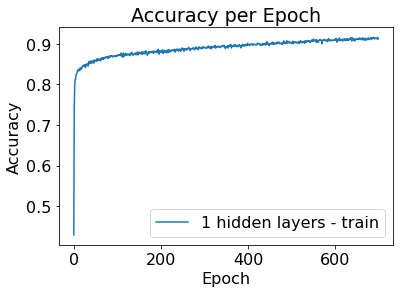

In [15]:
fig, ax = plt.subplots()
ax.plot(history.epoch, history.history['accuracy'], label = f'{n_hidden} hidden layers - train')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy per Epoch')
ax.legend()

In [16]:
model.evaluate(X_test_scaled, y_test_1hot)  # Calculate performance metrics on unseen test data

63/63 [==============================] - 0s 570us/step - loss: 0.3112 - accuracy: 0.8740


[0.3111785054206848, 0.8740000128746033]

### Neural Network Grid Search

In [17]:
nn_model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=src.models.create_model, X=X_trn_scaled, n_classes=6, opt=opt)

In [ ]:
# Set grid search parameters
nn_param_grid = dict(epochs=[700], batch_size=[20], n_hidden=[1,2], hidden_units=[20, 50], activ=['sigmoid','exponential'])
grid = GridSearchCV(estimator=nn_model, param_grid=nn_param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_trn_scaled, y_trn_1hot)

In [ ]:
grid_result.best_params_  #print parameters of best neural network

In [ ]:
grid_result.best_estimator_.model.evaluate(X_test_scaled, y_test_1hot)  # Calculate performance on unseen test data

In [ ]:
grid_result.best_estimator_.classes_= np.array([1,2,3,4,5,7]) #reset class labels

In [ ]:
# Predict y values for test set
yhat_nn= grid_result.best_estimator_.predict(X_test_scaled)

In [ ]:
# Confusion Matrix for Neural Network
src.plots.plot_cm(y_test, yhat_nn, grid_result.best_estimator_.classes_)

### Random Forest Classifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=0, class_weight='balanced')
rf_clf.fit(X_train, y_train)       #Train the model
y_trn_rf = rf_clf.predict(X_train)
print(f'Train Accuracy: {accuracy_score(y_train, y_trn_rf)}')
y_rf = rf_clf.predict(X_test)      #Predict values for test set
print(f'Test Accuracy: {accuracy_score(y_test, y_rf)}')

### Random Forest Grid Search

In [ ]:
# Construct grid of parameters for search
rf_param_grid = dict(n_estimators=[10, 50, 100, 150, 200], min_samples_split=np.arange(2,10,2),
    min_samples_leaf=np.arange(1,10,2), max_depth = np.arange(10,100,10),
    class_weight=['balanced', 'balanced_subsample'])

In [ ]:
# Perform search
grid = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, n_jobs=-1, cv=5,scoring='f1_weighted')
rf_grid_result = grid.fit(X_train, y_train)

In [ ]:
print(f'Best Estimator Parameters: {rf_grid_result.best_params_}\n')
print(f'Average Validation Accuracy: {rf_grid_result.best_score_}')

In [ ]:
y_rf = rf_grid_result.best_estimator_.predict(X_test)
score = f1_score(y_test, y_rf, average='weighted')
print(f'Test F1 Score: {np.round(score,3)}\n')
print(f'Test Accuracy Score: {accuracy_score(y_test, y_rf)}')

In [ ]:
# Plot confusion matrix for best random forest classifier
src.plots.plot_cm(y_test, y_rf, rf_grid_result.best_estimator_.classes_)

## Compare model performance

In [ ]:
print(f1_score(y_test, y_rf, average='weighted'), f1_score(y_test, yhat_nn, average='weighted'),\
      f1_score(y_test, y_test_predict, average='weighted'))

In [ ]:
# Compare confusion matrices
fig, axs = plt.subplots(1,3,figsize=(20,5))
# Plot confusion matrix for each classifier
src.plots.plot_cm(y_test, y_test_predict, labels, axs[0])
src.plots.plot_cm(y_test, y_rf, rf_grid_result.best_estimator_.classes_, axs[1])
src.plots.plot_cm(y_test, yhat_nn, grid_result.best_estimator_.classes_, axs[2])
# Label subplots
axs[0].set_title(f'Baseline\n(Accuracy = {np.round(accuracy_score(y_test, y_test_predict),2)})')
axs[1].set_title(f'Random Forest\n(Accuracy = {np.round(accuracy_score(y_test, y_rf),2)})')
axs[2].set_title(f'Neural Network\n(Accuracy = {np.round(accuracy_score(y_test, yhat_nn),2)})')